In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

# Simulation
+ JSAP version: 547
+ Energy: 2 MeV
+ Geo: 1 t
+ Simulation: (0,z/5,z): z from -0.65 to 0.65 m, step 0.01 m
+ 20k events per point

In [6]:
# example of read 1 file
def main(path):
    for i,file in enumerate(np.arange(-0.60,0.65,0.05)):

        h = tables.open_file('../%s/1t_%+.2f.h5' % (path, file),'r')
        recondata = h.root.Recon
        ID = recondata[:]['EventID']
        E_raw = recondata[:]['E_sph']
        x_raw = recondata[:]['x_sph']
        y_raw = recondata[:]['y_sph']
        z_raw = recondata[:]['z_sph']
        L_raw = recondata[:]['Likelihood']
        s_raw = recondata[:]['success']
        # post process data
        size = np.size(np.unique(ID))
        data = np.zeros((5, size))
        for j_index, IDu in enumerate(np.unique(ID)):
            if(IDu == 0):
                pass
            else:
                index = (ID == IDu)
                x1 = x_raw[index]
                y1 = y_raw[index]
                z1 = z_raw[index]
                if(np.size(x1)>1):
                    a  = np.vstack((x1, y1, z1))
                    dist = pdist(a.T)
                    dist = squareform(dist)
                    L_tmp = L_raw[index]
                    E_tmp = E_raw[index]
                    x_tmp = x_raw[index]
                    y_tmp = y_raw[index]
                    z_tmp = z_raw[index]
                    s_tmp = s_raw[index]
                    while np.sum(dist<0.01) > np.size(dist[0,:]):
                        flag = 0
                        for k in np.arange(np.size(dist[0,:])):
                            for l in np.arange(np.size(dist[0,:])):
                                if (dist[k,l] < 0.01) & (l!=k):
                                    flt = np.arange(np.size(dist[0,:]))!= l
                                    dist = dist[flt]
                                    dist = dist[:, flt]
                                    E_tmp = E_tmp[flt]
                                    x_tmp = x_tmp[flt]
                                    y_tmp = y_tmp[flt]
                                    z_tmp = z_tmp[flt]
                                    s_tmp = s_tmp[flt]
                                    L_tmp = L_tmp[flt]
                                    flag = 1
                                    break
                                else:
                                    pass
                            if(flag == 1):
                                break
                    L_index = np.where(L_tmp == np.min(L_tmp))[0][0]
                    data[0,j_index] = E_tmp[L_index]
                    data[1,j_index] = x_tmp[L_index]
                    data[2,j_index] = y_tmp[L_index]
                    data[3,j_index] = z_tmp[L_index]
                    data[4,j_index] = s_tmp[L_index]
                    sort = np.argsort(L_tmp)
                    try:
                        #if((L_tmp[sort][0] < L_tmp[sort][1] - 5) & (L_tmp[sort][0] > L_tmp[sort][1] - 1)):
                        #    data[4,j_index] = 0
                        if((L_tmp[sort][0] > L_tmp[sort][1])):
                            data[4,j_index] = 0
                    except:
                        pass
                else:
                    data[0,j_index] = E_raw[j_index]
                    data[1,j_index] = x_raw[j_index]
                    data[2,j_index] = y_raw[j_index]
                    data[3,j_index] = z_raw[j_index]
                    data[4,j_index] = s_raw[j_index]

        data = data[:,~(data[4,:]==0)]        
        x = data[1]
        y = data[2]
        z = data[3]
        
        r = np.sqrt(x**2 + y**2 + z**2)
        index = (r>0.01) & (r<0.63)
        H1, xedges, yedges = np.histogram2d((x[index])**2 + (y[index])**2, z[index], bins=50)
        X, Y = np.meshgrid(xedges[1:],yedges[1:])
        plt.figure(dpi=150)
        plt.contourf(X,Y,np.log(np.transpose(H1)+1))
        plt.colorbar()
        plt.xlabel('x^2 + y^2/m^2')
        plt.ylabel('z/m')
        plt.title('radius=%+.2fm' % file)
        plt.savefig('./fig/Scatter_1MeV%+.2f.pdf' % file)
        plt.show()

        plt.figure(dpi=150)
        plt.hist(r[index], bins=50)
        plt.axvline(np.abs(file), color='red')
        plt.xlabel('Recon radius/m')
        plt.ylabel('Num')
        plt.legend(['real','data'])
        plt.title('Radius=%+.2fm, std = %.4fm,\n avg_bias = %.4fm, bias = %.4fm' \
                  % (file, np.std(z[index]-file), np.mean(z[index]-file), np.mean(np.abs(z[index]-file))))
        plt.savefig('./fig/HistR_1MeV%+.2f.pdf' % file)
        plt.show()
main('result_1t_2.0MeV_015_15_MC')

ValueError: no field of name E_sph

In [58]:
# example of read 1 file
def main(path):
    for i,file in enumerate(np.arange(-0.55,-0.50,0.05)):

        h = tables.open_file('../%s/1t_%+.2f.h5' % (path, file),'r')
        recondata = h.root.Recon
        ID = recondata[:]['EventID']
        E_raw = recondata[:]['E_sph']
        x_raw = recondata[:]['x_sph']
        y_raw = recondata[:]['y_sph']
        z_raw = recondata[:]['z_sph']
        L_raw = recondata[:]['Likelihood']
        s_raw = recondata[:]['success']
        # post process data
        size = np.size(np.unique(ID))
        data = np.zeros((5, size))
        for j_index, IDu in enumerate(np.unique(ID)):
            print(j_index)
            if(IDu == 0):
                pass
            else:
                index = (ID == IDu)
                x1 = x_raw[index]
                y1 = y_raw[index]
                z1 = z_raw[index]
                if(np.size(x1)>1):
                    a  = np.vstack((x1, y1, z1))
                    dist = pdist(a.T)
                    dist = squareform(dist)

                    L_tmp = L_raw[index]
                    E_tmp = E_raw[index]
                    x_tmp = x_raw[index]
                    y_tmp = y_raw[index]
                    z_tmp = z_raw[index]
                    s_tmp = s_raw[index]
                    
                    r_tmp = np.sqrt(x_tmp**2 + y_tmp**2 + z_tmp**2)
                    while np.sum(dist<0.1) > np.size(dist[0,:]):
                        flag = 0
                        for k in np.arange(np.size(dist[0,:])):
                            for l in np.arange(np.size(dist[0,:])):
                                if (dist[k,l] < 0.01) & (l!=k):
                                    flt = np.arange(np.size(dist[0,:]))!= l
                                    dist = dist[flt]
                                    dist = dist[:, flt]
                                    E_tmp = E_tmp[flt]
                                    x_tmp = x_tmp[flt]
                                    y_tmp = y_tmp[flt]
                                    z_tmp = z_tmp[flt]
                                    s_tmp = s_tmp[flt]
                                    L_tmp = L_tmp[flt]
                                    flag = 1
                                    break
                                else:
                                    pass
                            if(flag == 1):
                                break

                    L_index = np.where(L_tmp == np.min(L_tmp))[0][0]
                    data[0,j_index] = E_tmp[L_index]
                    data[1,j_index] = x_tmp[L_index]
                    data[2,j_index] = y_tmp[L_index]
                    data[3,j_index] = z_tmp[L_index]
                    data[4,j_index] = s_tmp[L_index]
                    sort = np.argsort(L_tmp)                    
                    try:
                        #if((L_tmp[sort][0] < L_tmp[sort][1] - 5) & (L_tmp[sort][0] > L_tmp[sort][1] - 1)):
                        #    data[4,j_index] = 0
                        if((L_tmp[sort][0] > L_tmp[sort][1] - 5)):
                            print(z_raw[index],L_raw[index])
                            print(L_tmp)
                            data[4,j_index] = 0
                        else:
                            print(np.sqrt(x_tmp[L_index]**2 + y_tmp[L_index]**2 + z_tmp[L_index]**2), L_tmp[0])
                    except:
                        pass
                else:
                    data[0,j_index] = E_raw[j_index]
                    data[1,j_index] = x_raw[j_index]
                    data[2,j_index] = y_raw[j_index]
                    data[3,j_index] = z_raw[j_index]
                    data[4,j_index] = s_raw[j_index]

        data = data[:,~(data[4,:]==0)]        
        x = data[1]
        y = data[2]
        z = data[3]
        
        r = np.sqrt(x**2 + y**2 + z**2)
        index = (r>0.01) & (r<0.55)
        H1, xedges, yedges = np.histogram2d((x[index])**2 + (y[index])**2, z[index], bins=50)
        X, Y = np.meshgrid(xedges[1:],yedges[1:])
        plt.figure(dpi=150)
        plt.contourf(X,Y,np.log(np.transpose(H1)+1))
        plt.colorbar()
        plt.xlabel('x^2 + y^2/m^2')
        plt.ylabel('z/m')
        plt.title('radius=%+.2fm' % file)
        plt.savefig('./fig/Scatter_1MeV%+.2f.pdf' % file)
        plt.show()

        plt.figure(dpi=150)
        plt.hist(r[index], bins=50)
        plt.axvline(np.abs(file), color='red')
        plt.xlabel('Recon radius/m')
        plt.ylabel('Num')
        plt.legend(['real','data'])
        plt.title('Radius=%+.2fm, std = %.4fm,\n avg_bias = %.4fm, abs_bias = %.4fm' \
                  % (file, np.std(z[index]-file), np.mean(z[index]-file), np.mean(np.abs(z[index]-file))))
        plt.savefig('./fig/HistR_1MeV%+.2f.pdf' % file)
        plt.show()
main('result_1t_2.0MeV_015_15_seg3')

0
1


KeyboardInterrupt: 

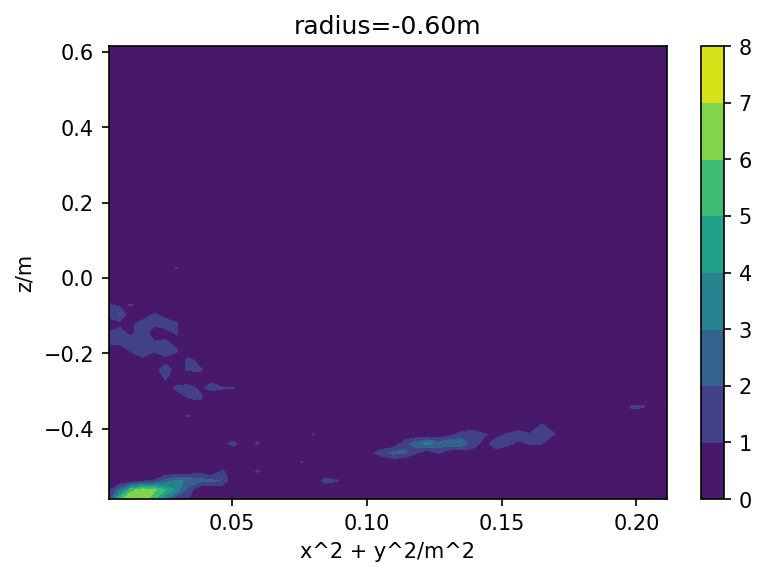

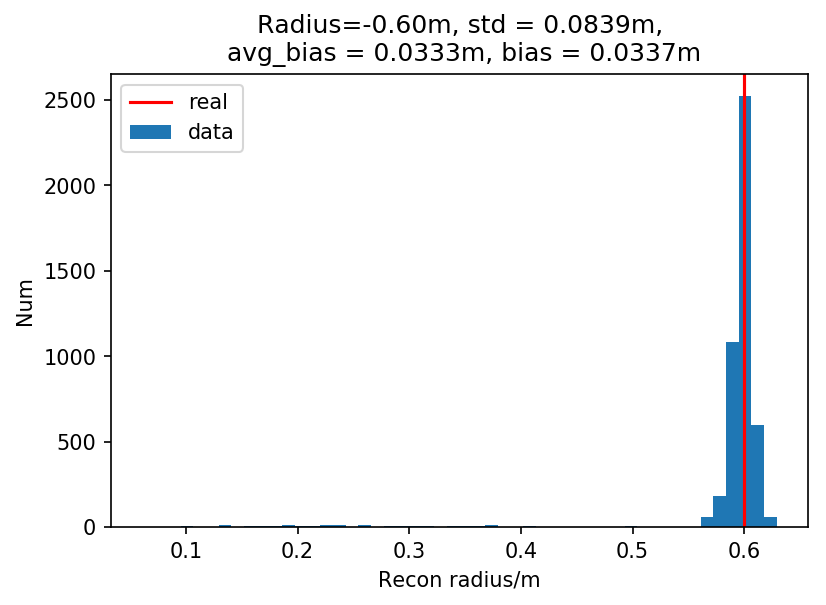

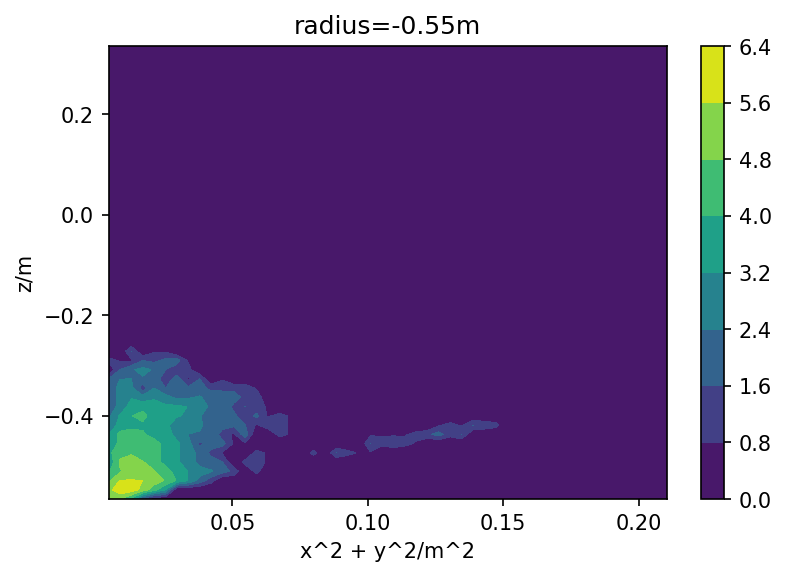

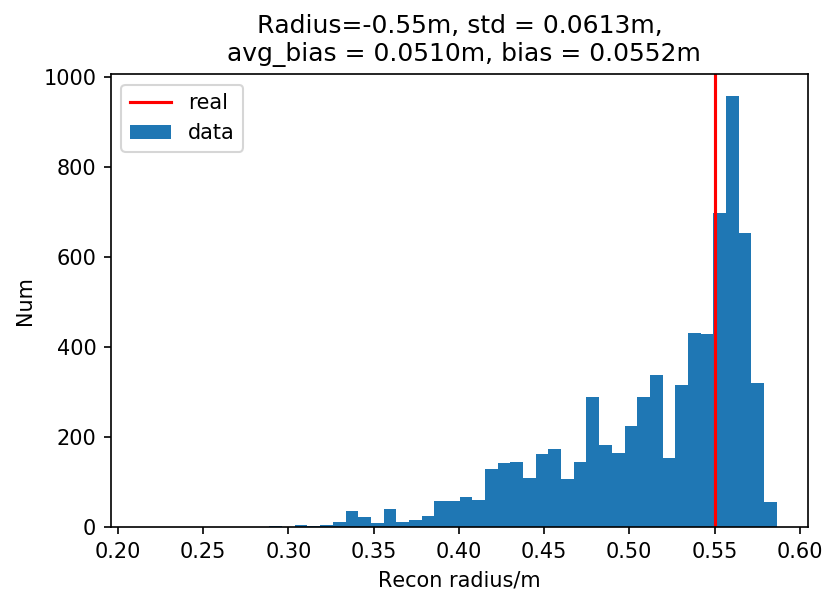

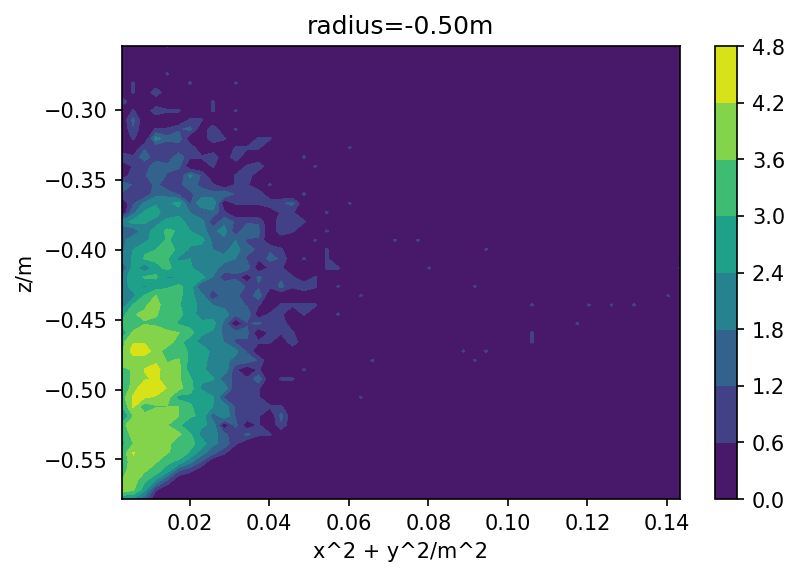

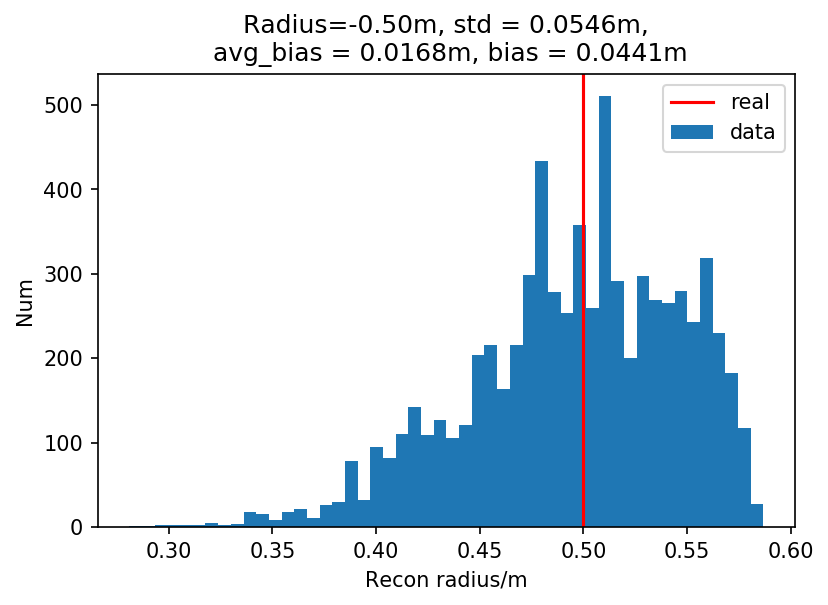

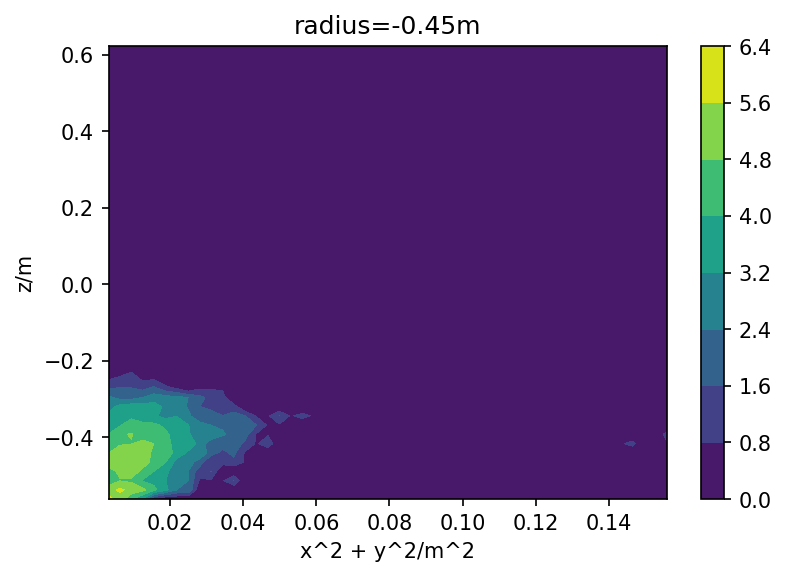

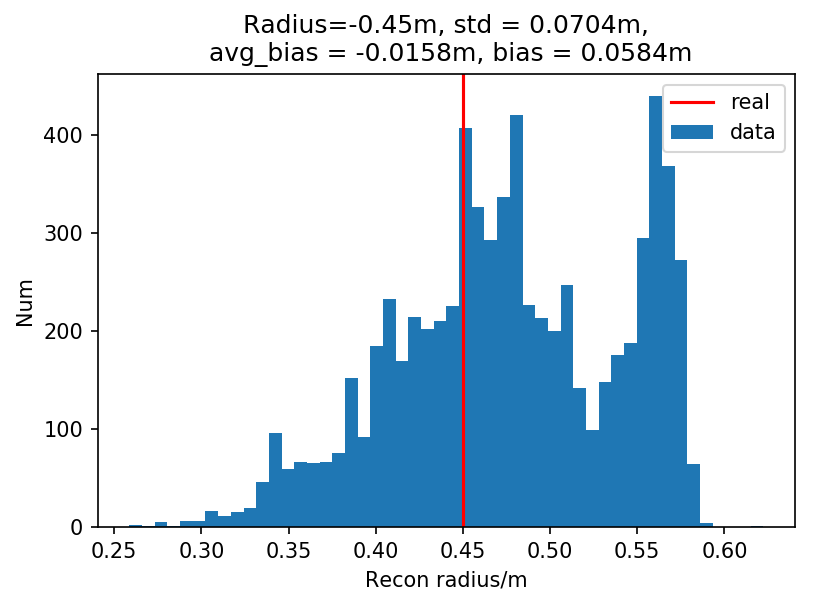

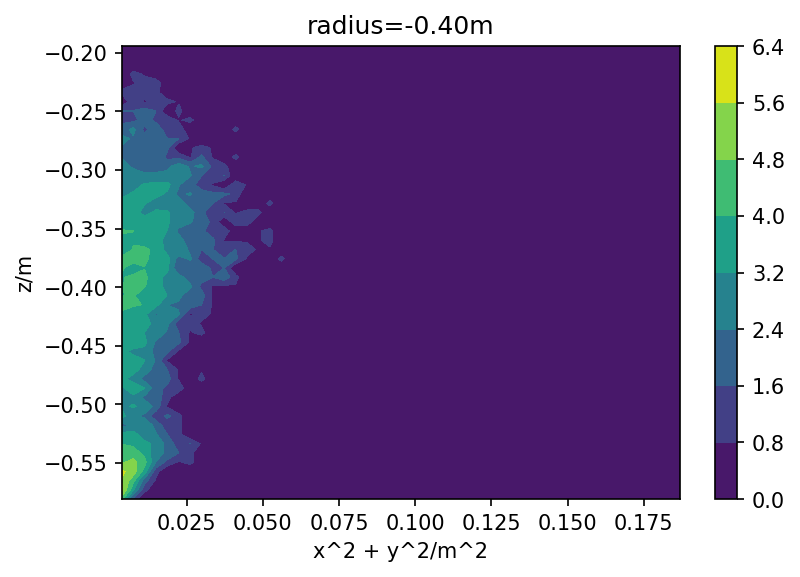

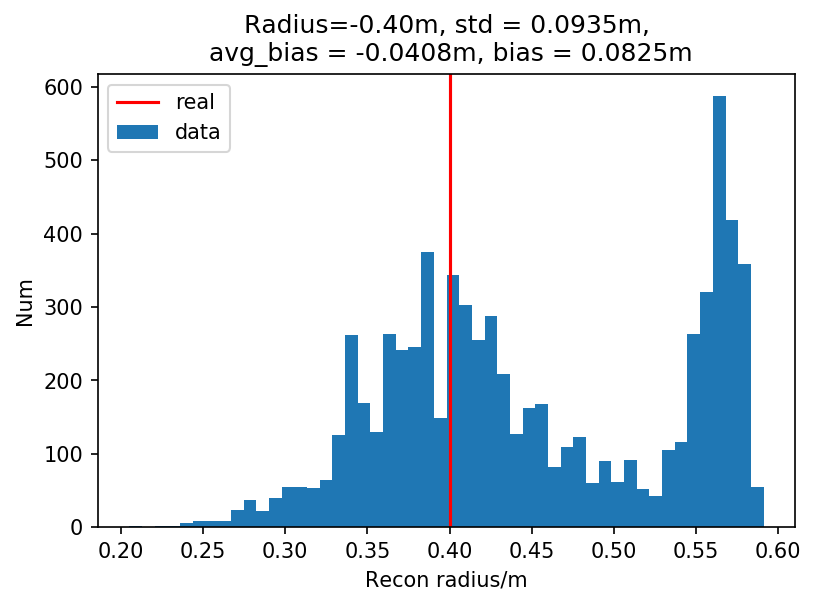

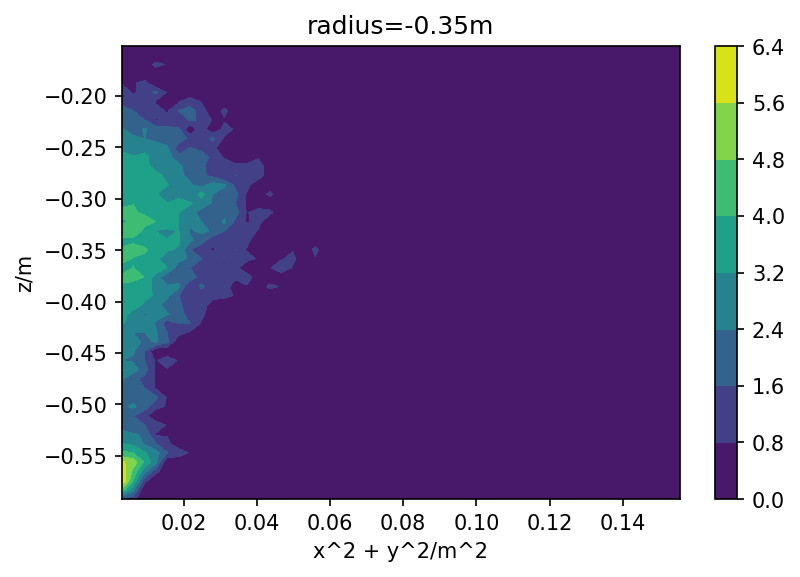

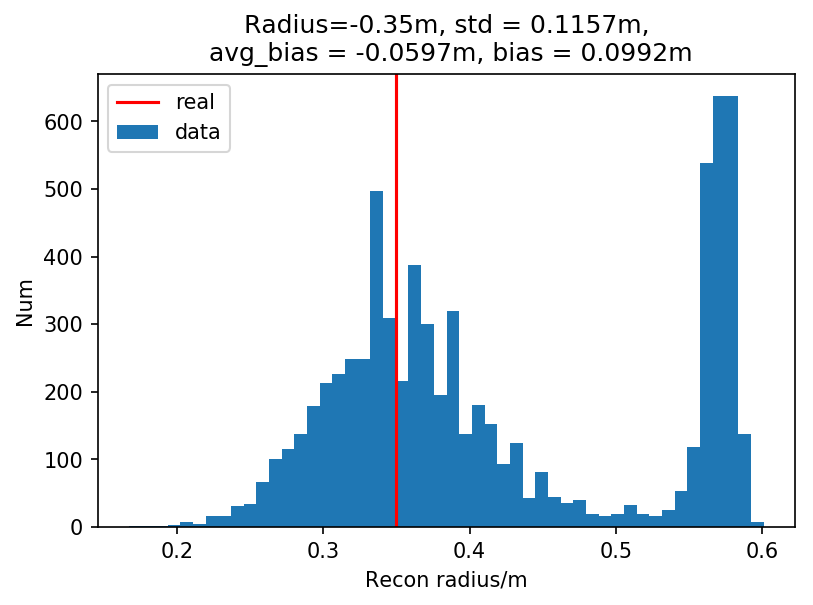

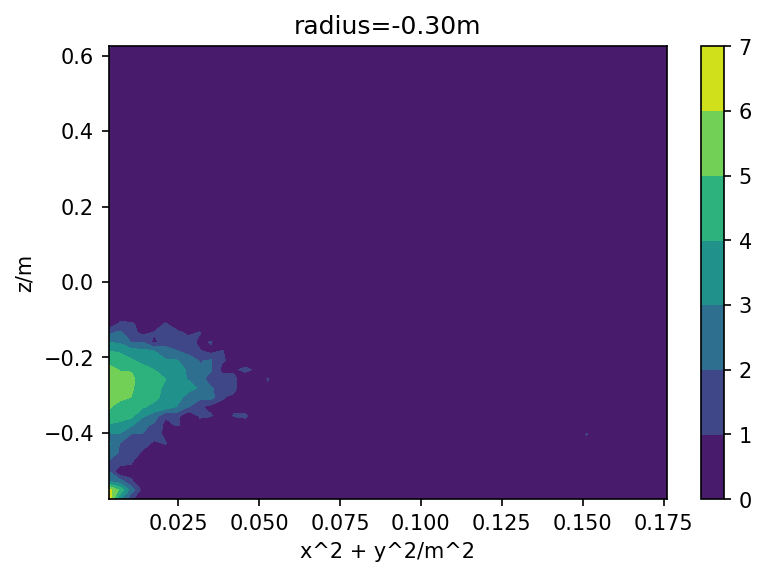

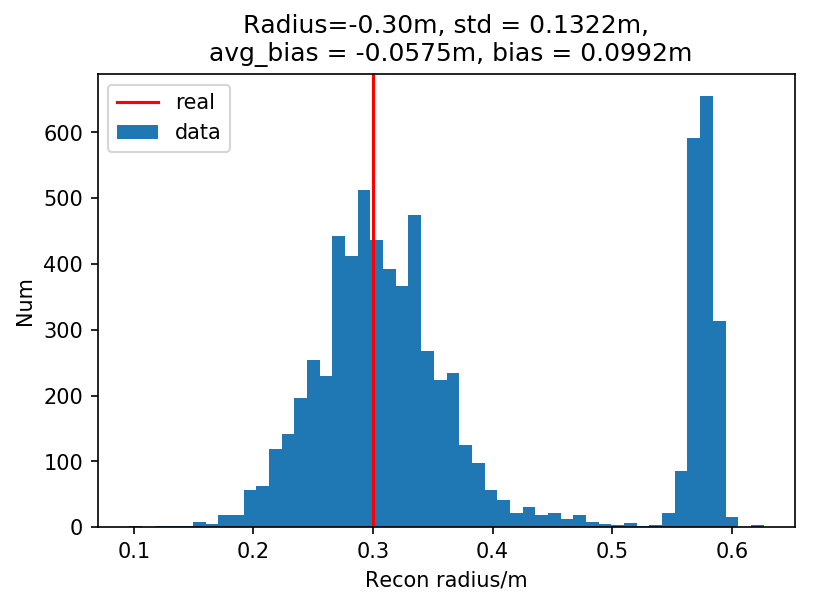

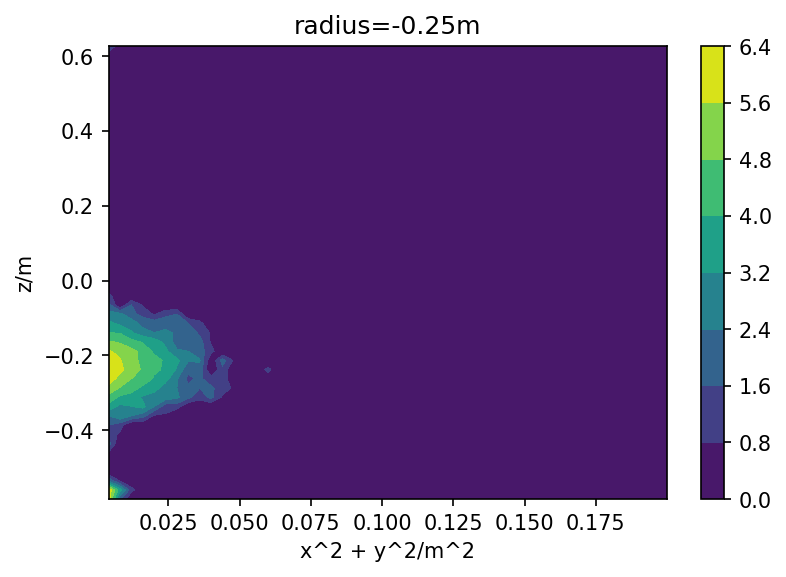

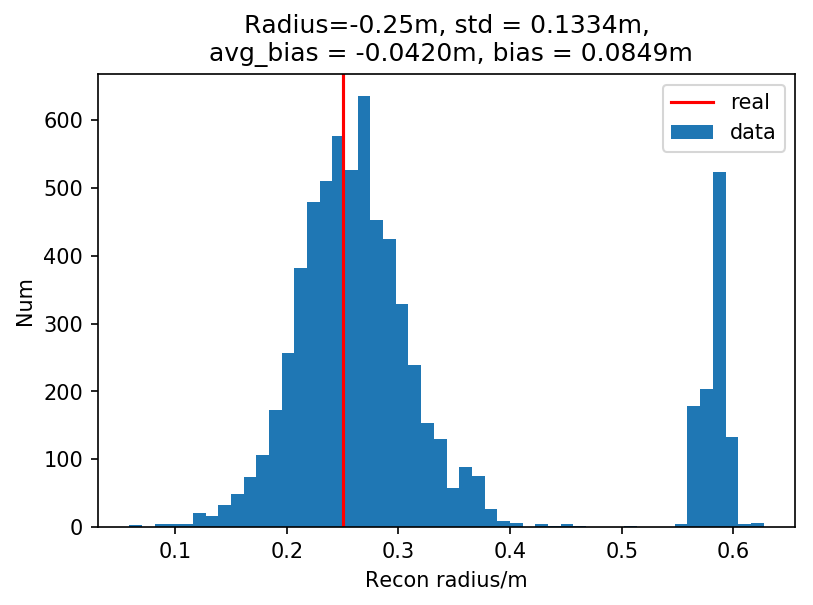

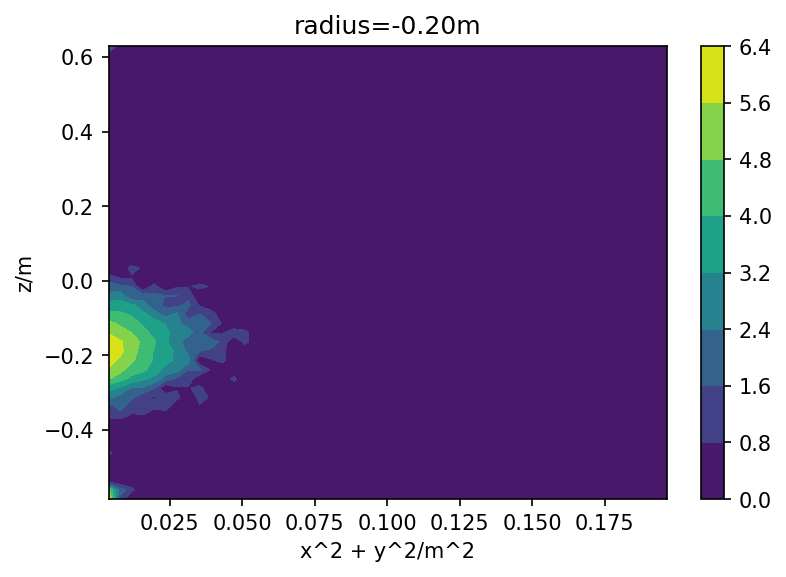

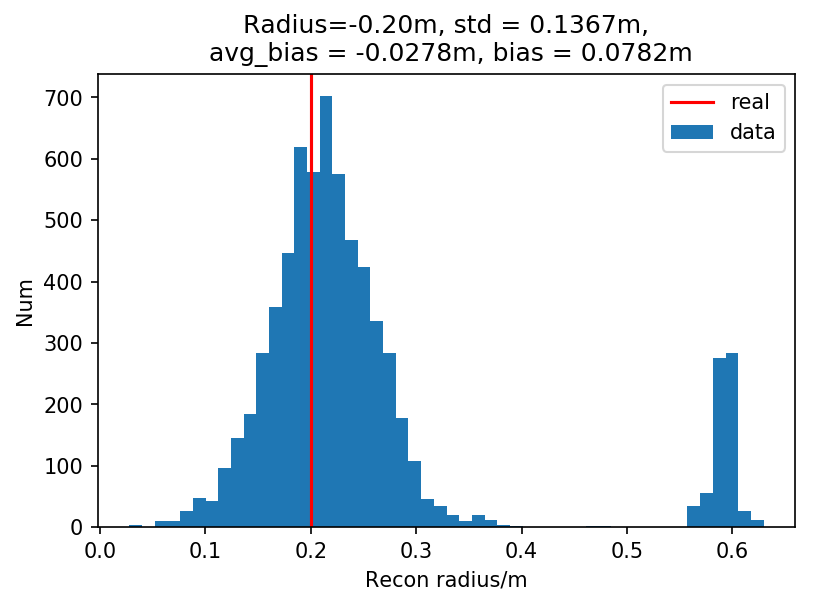

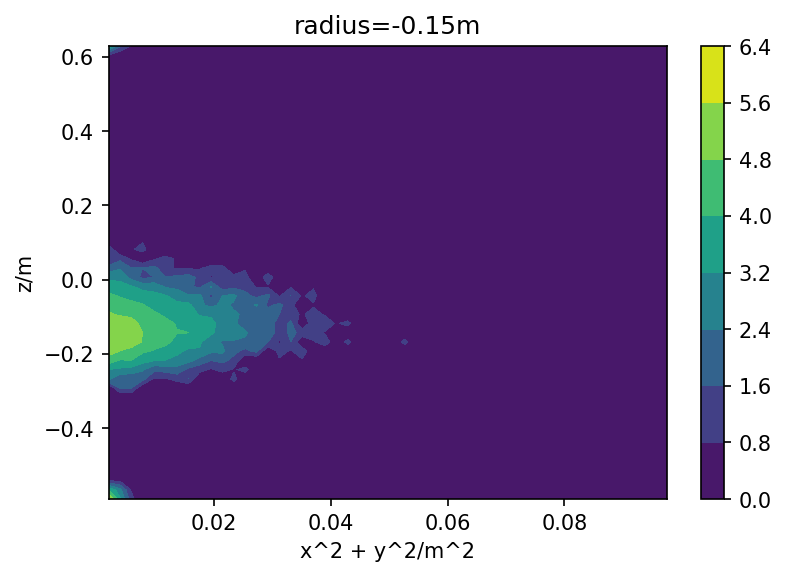

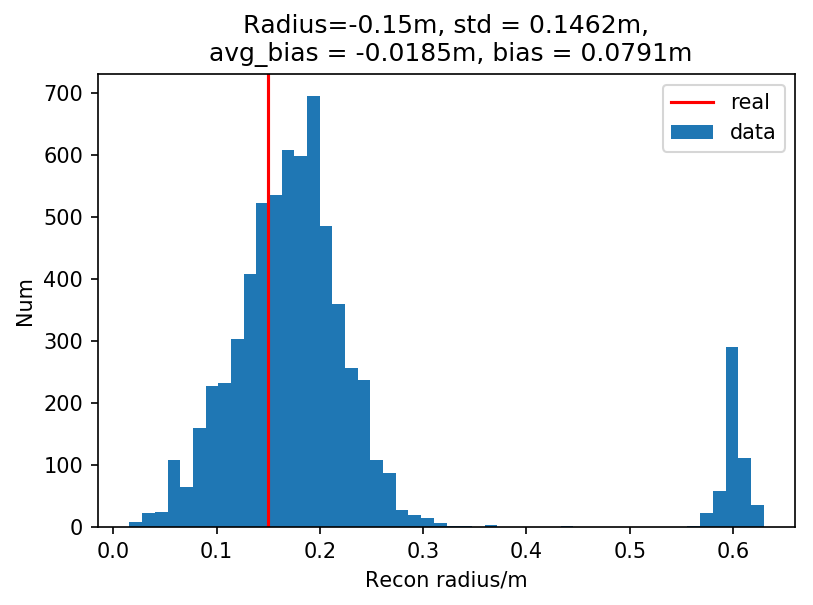

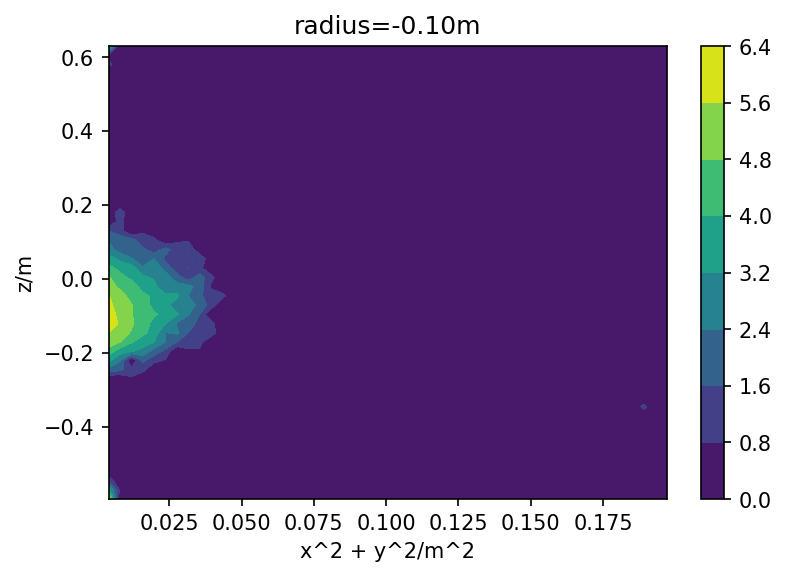

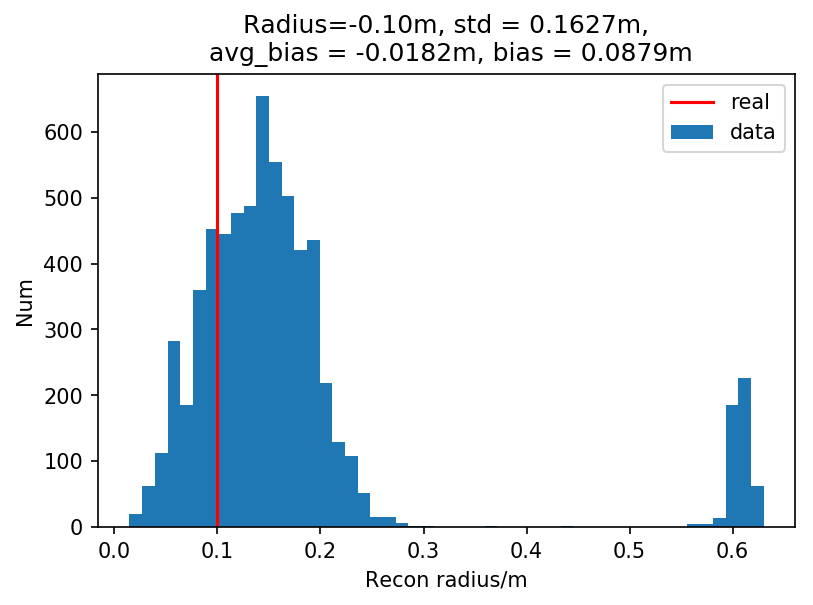

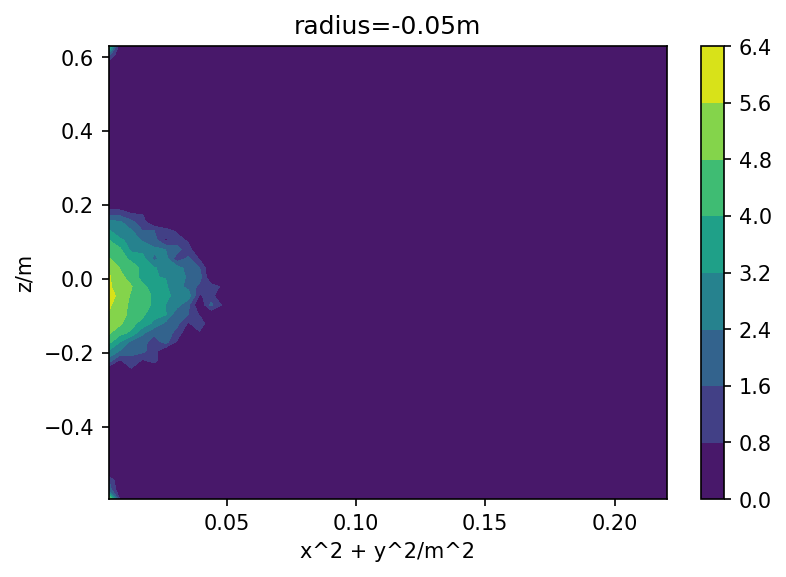

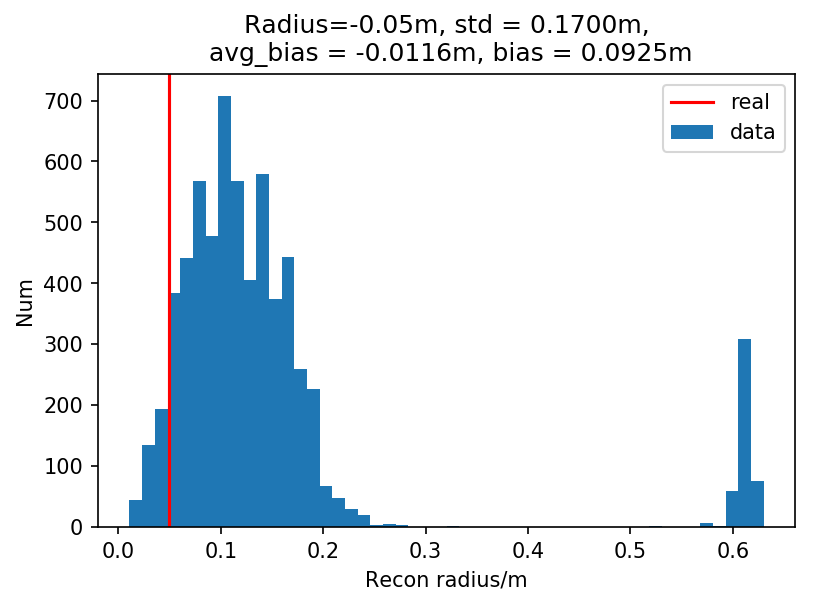

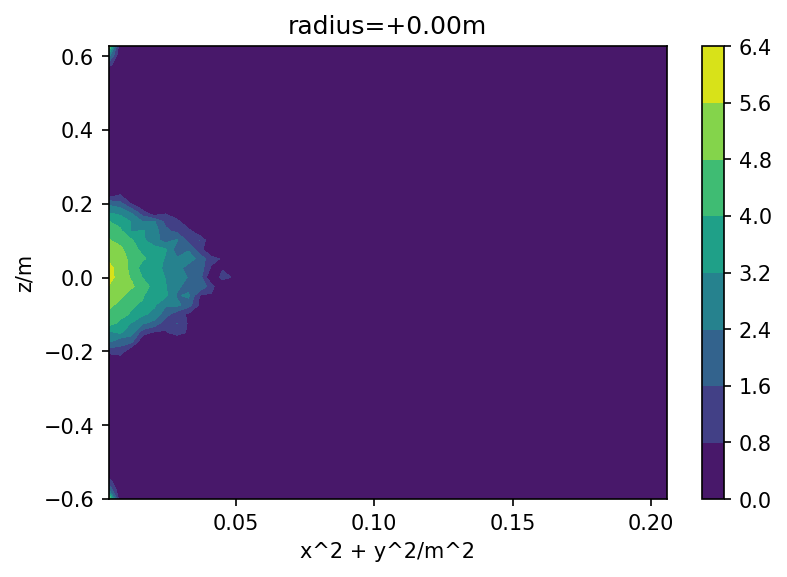

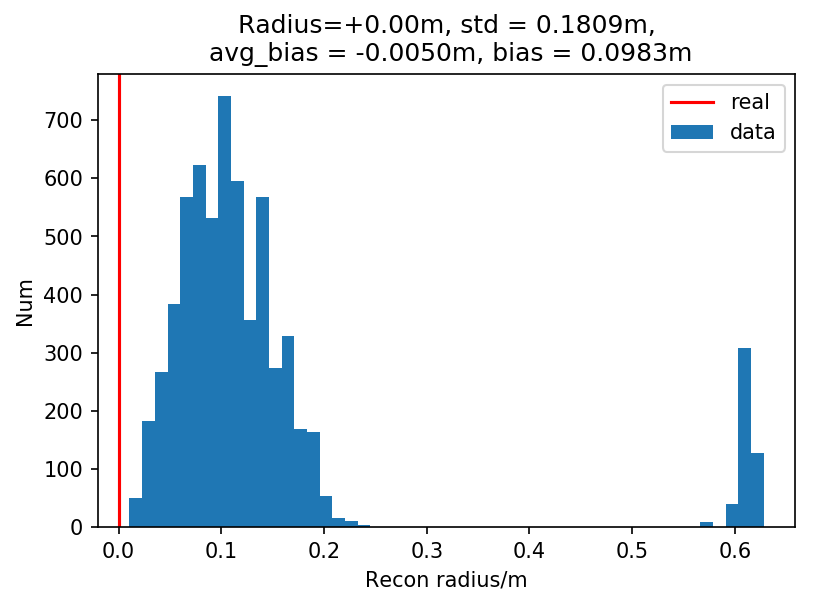

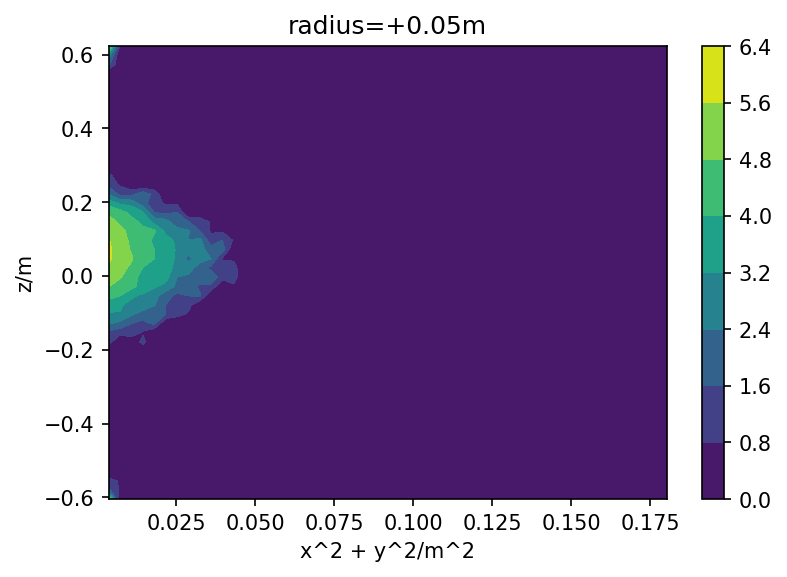

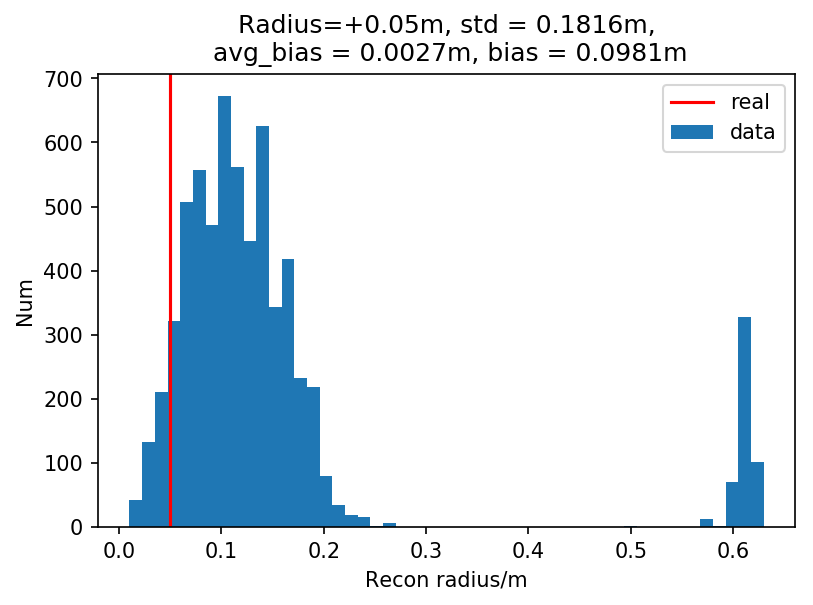

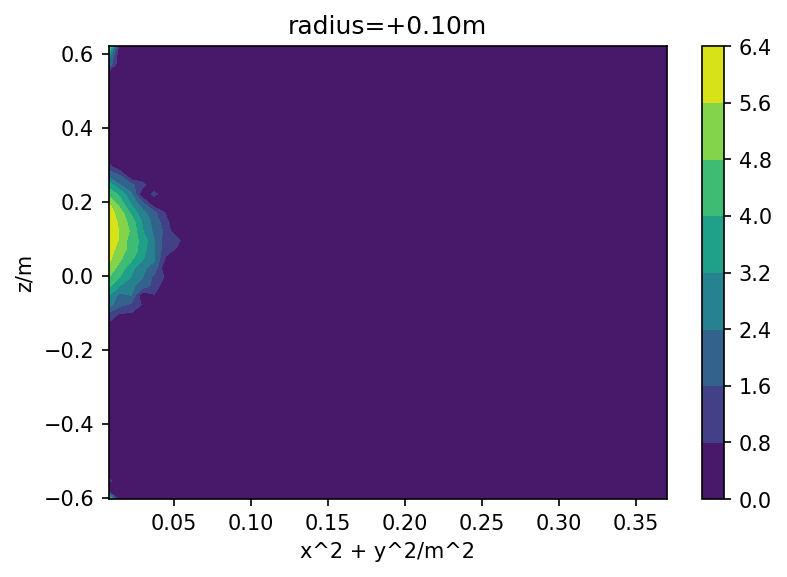

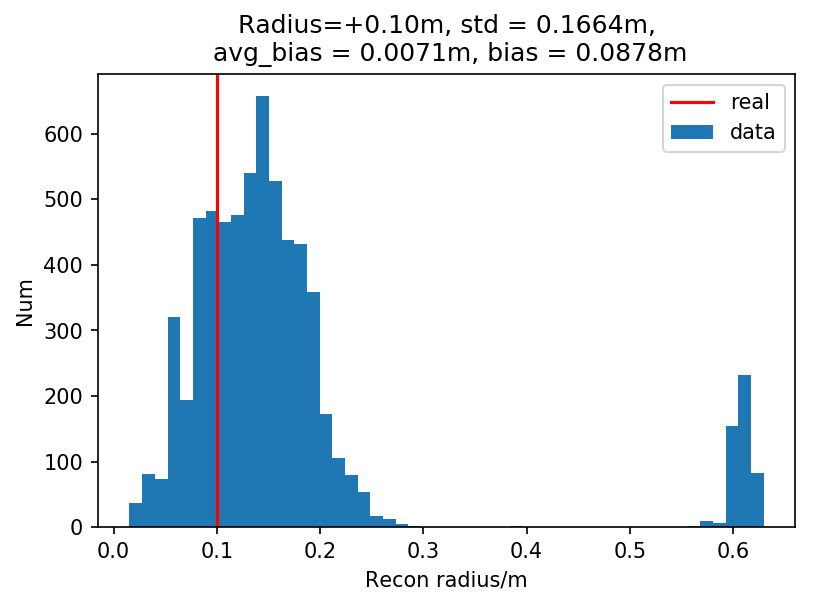

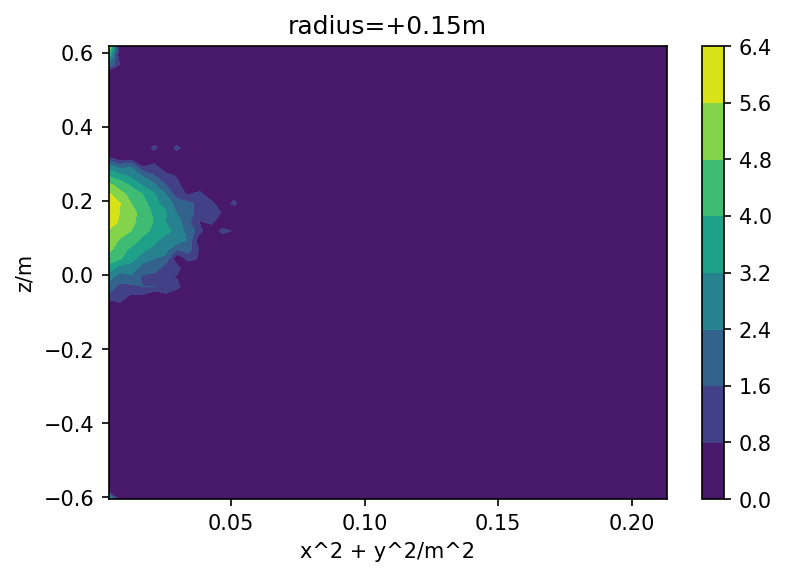

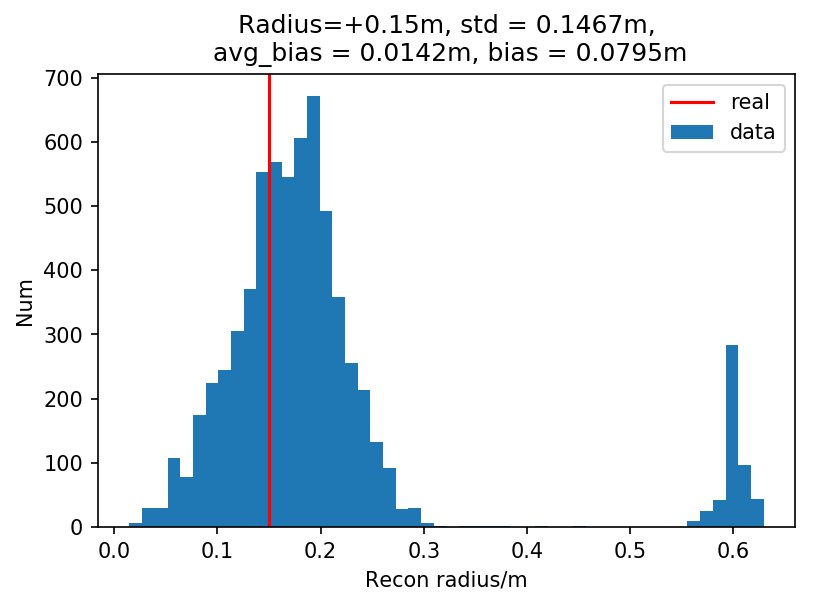

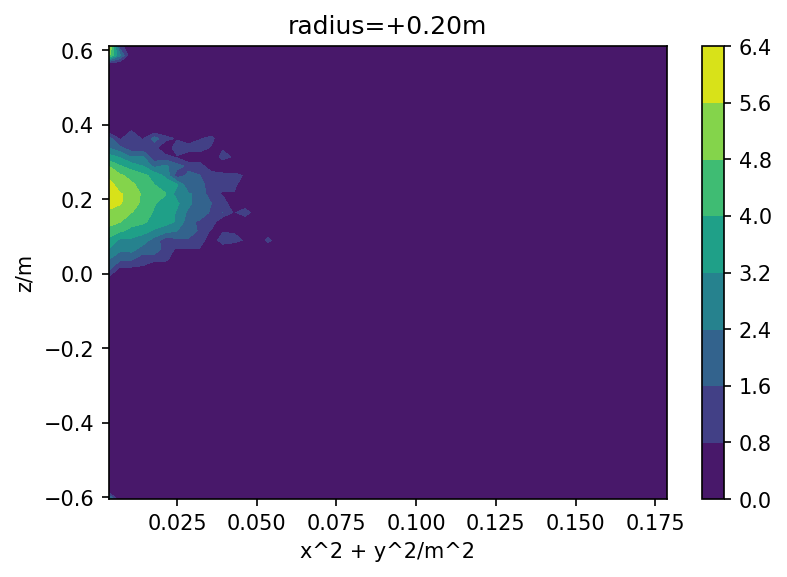

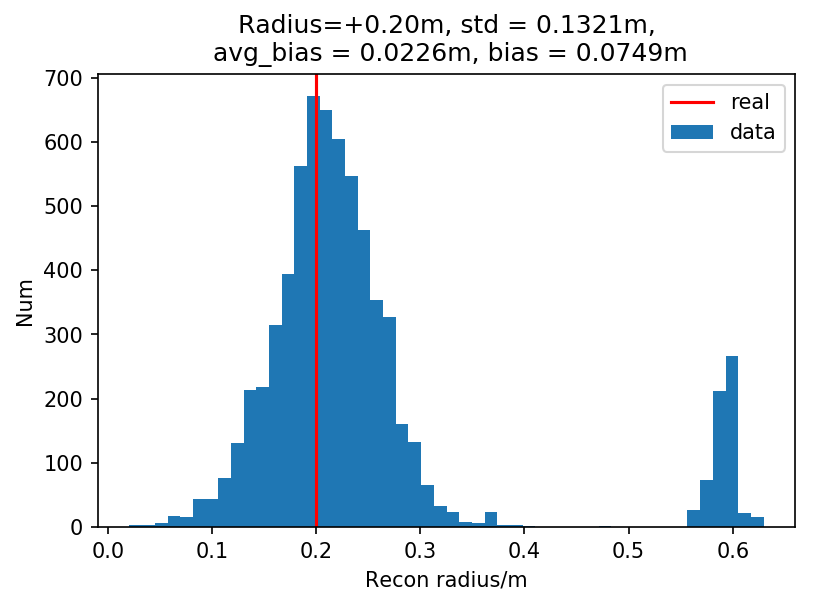

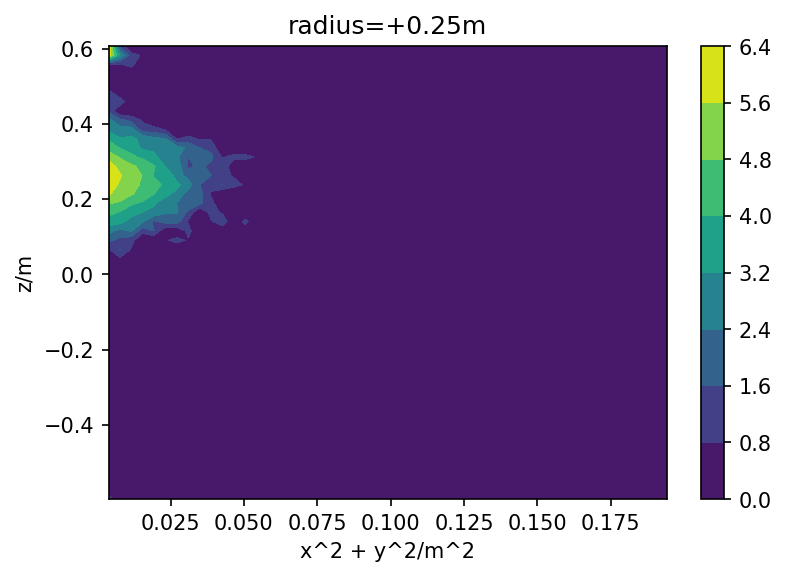

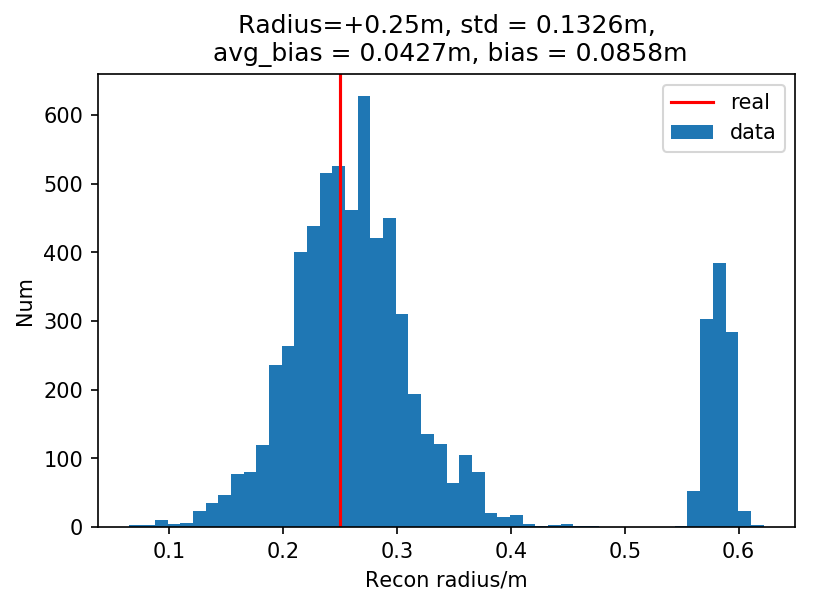

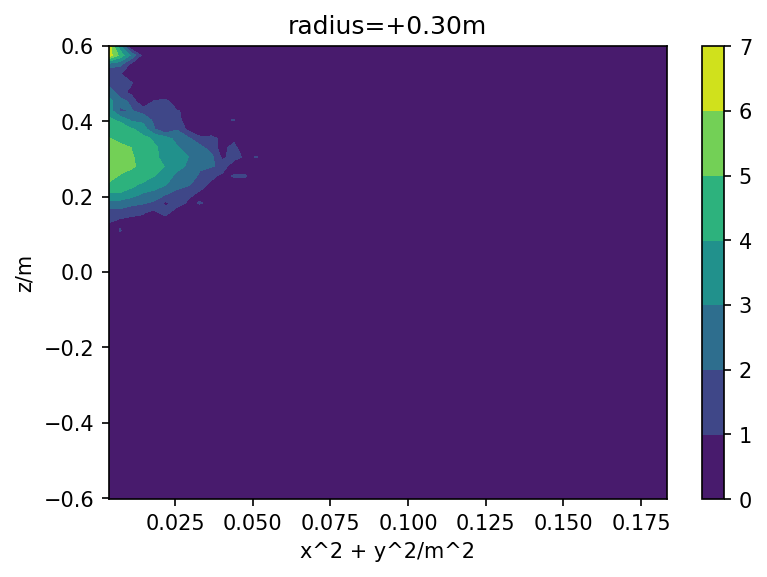

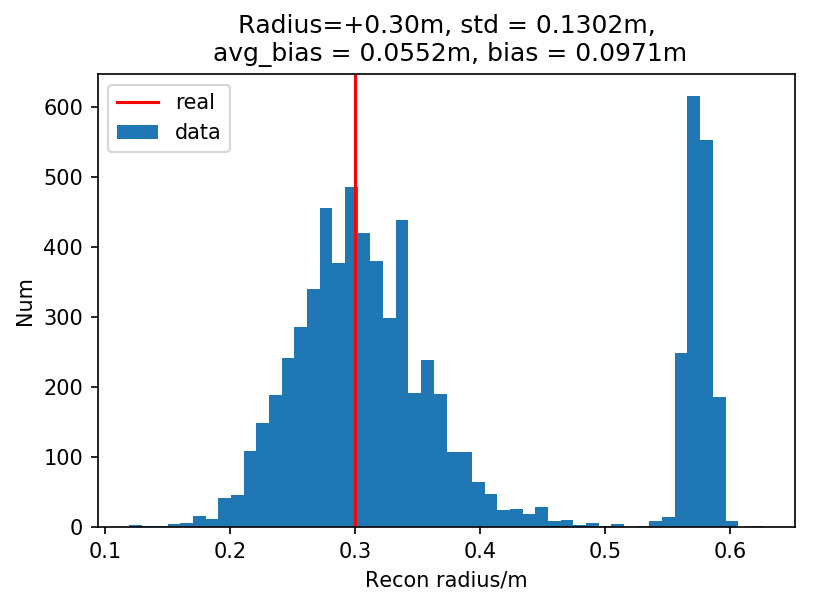

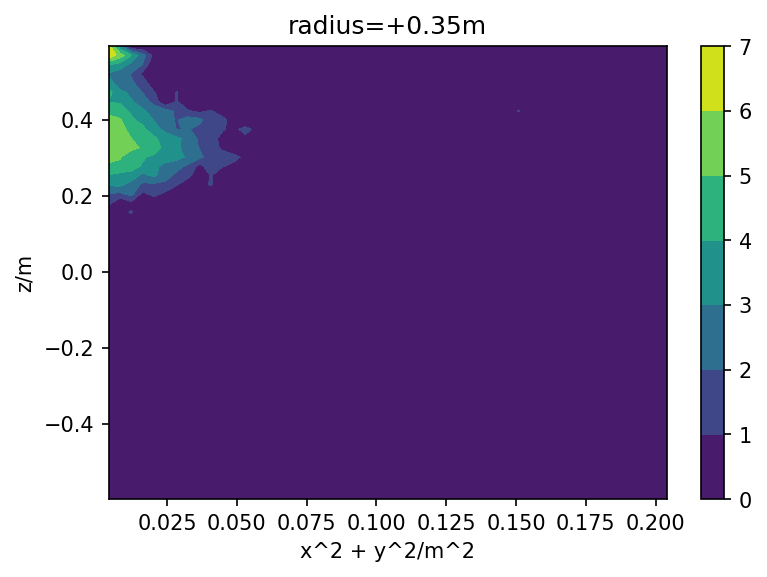

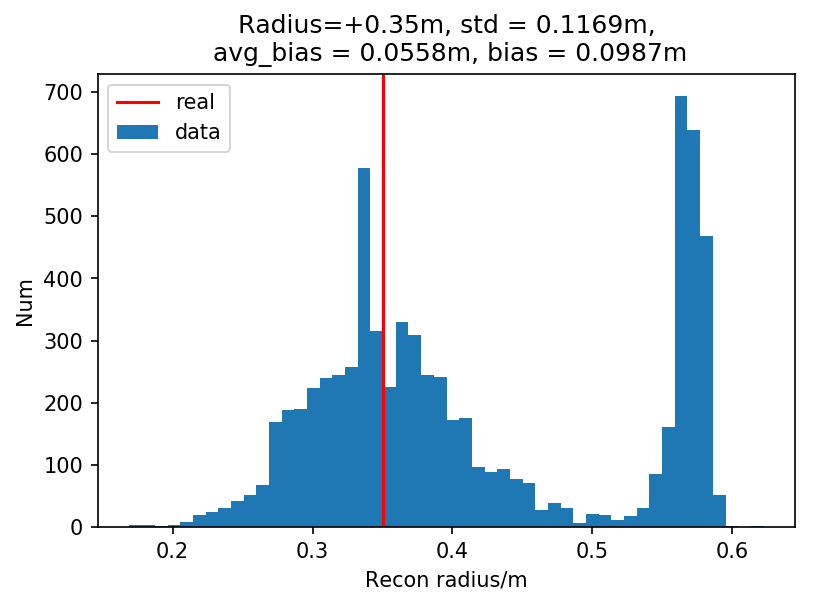

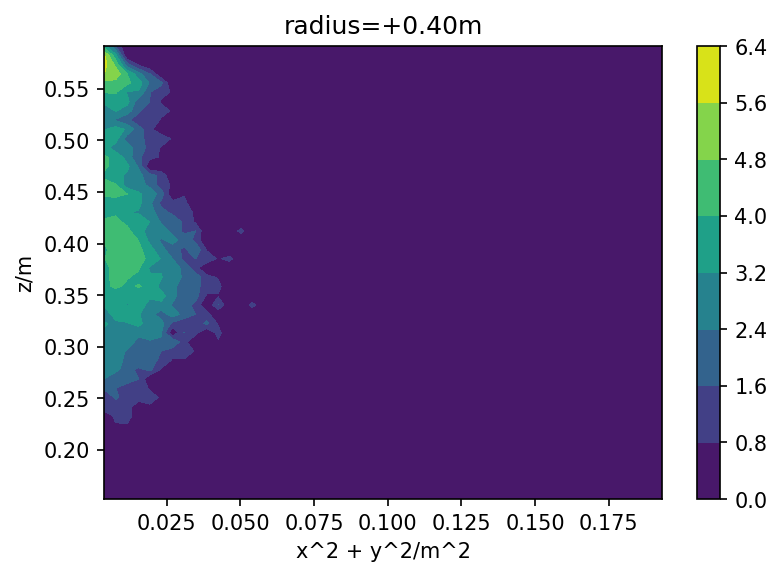

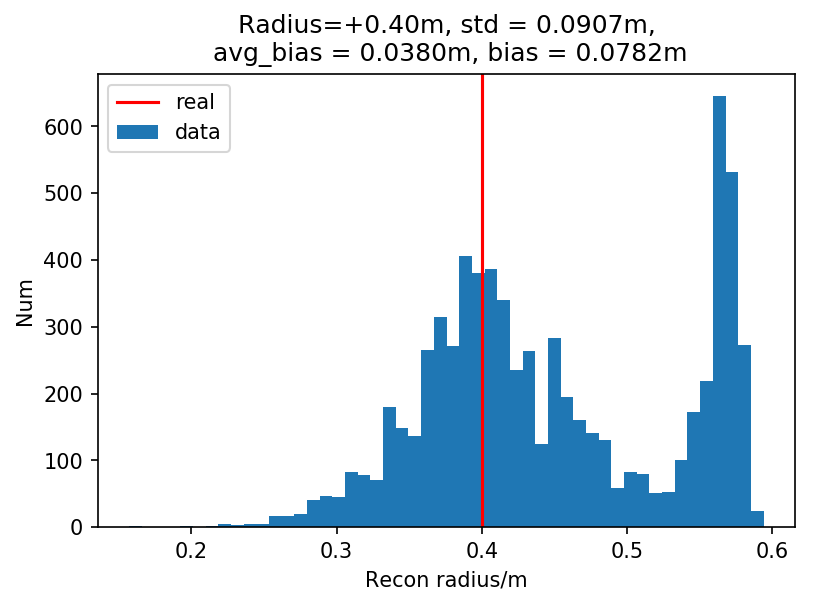

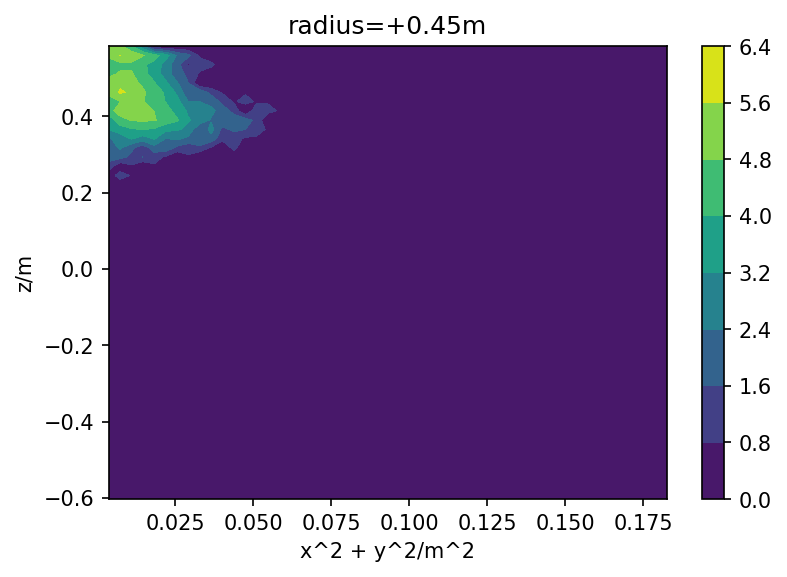

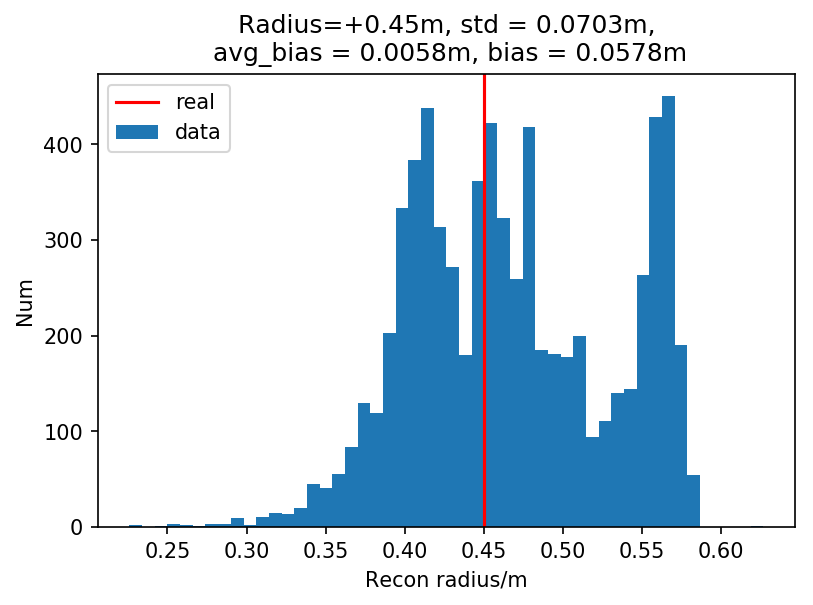

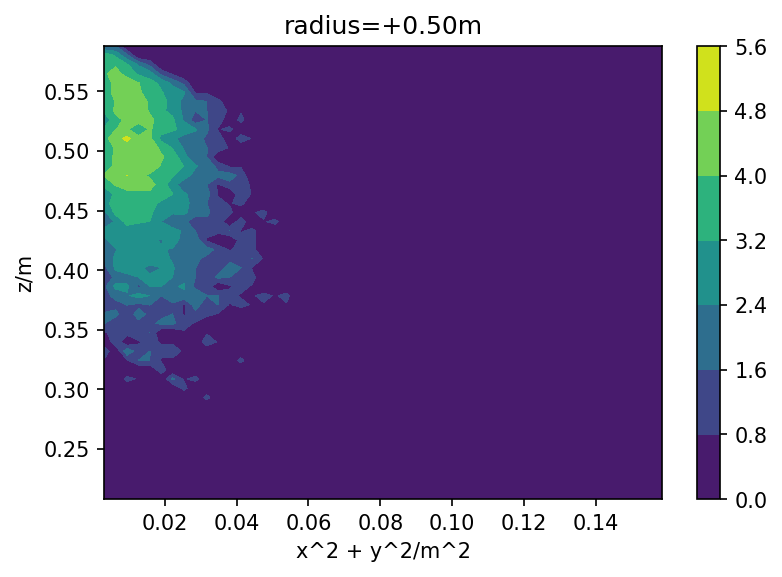

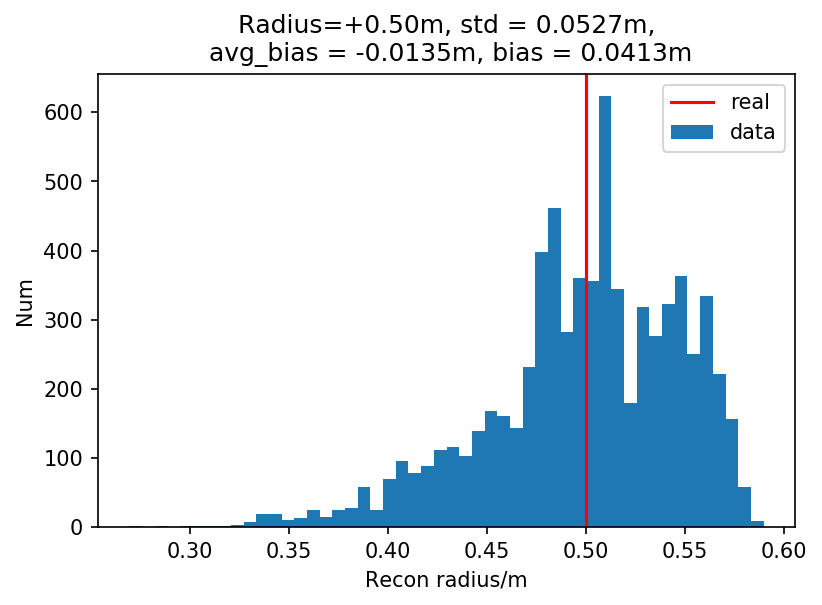

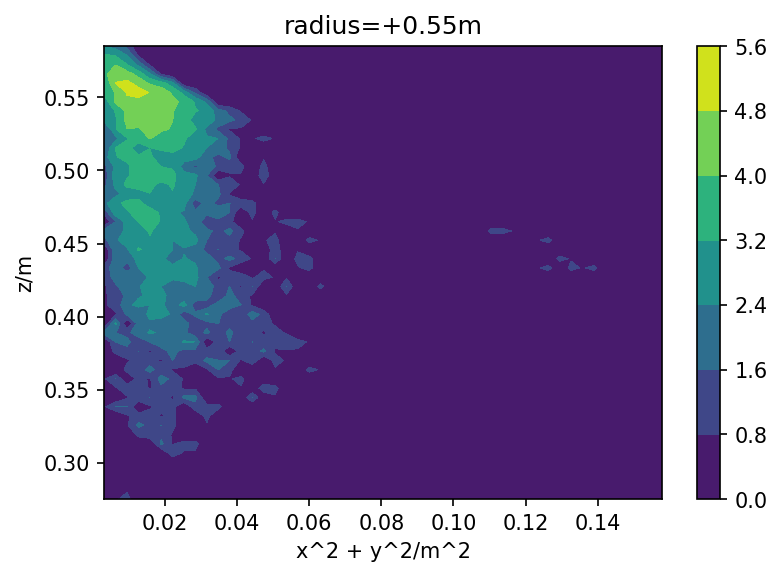

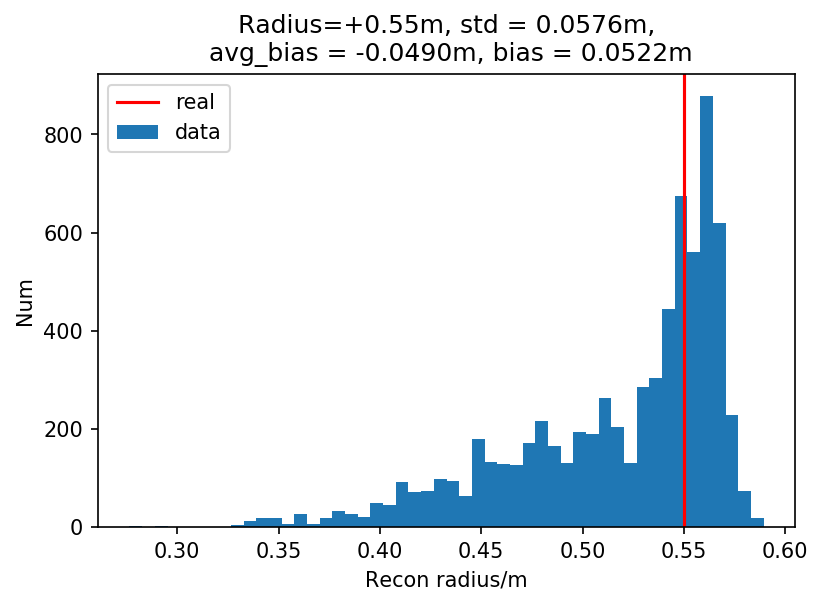

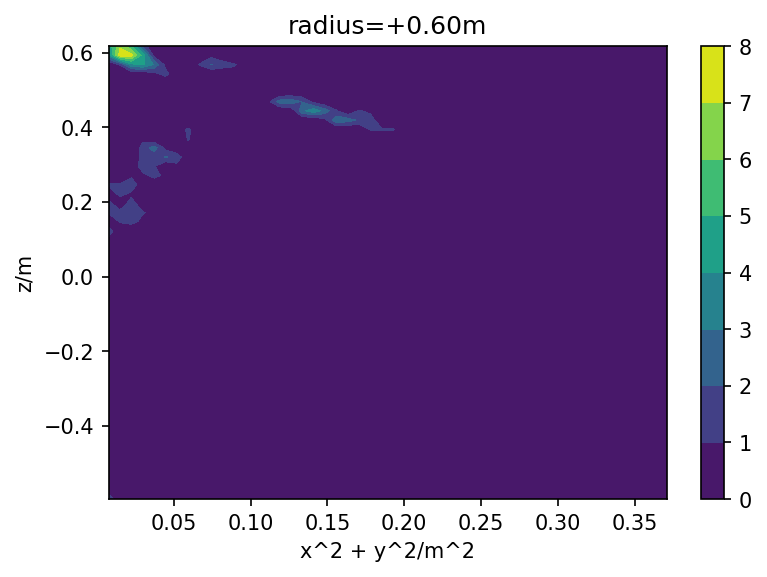

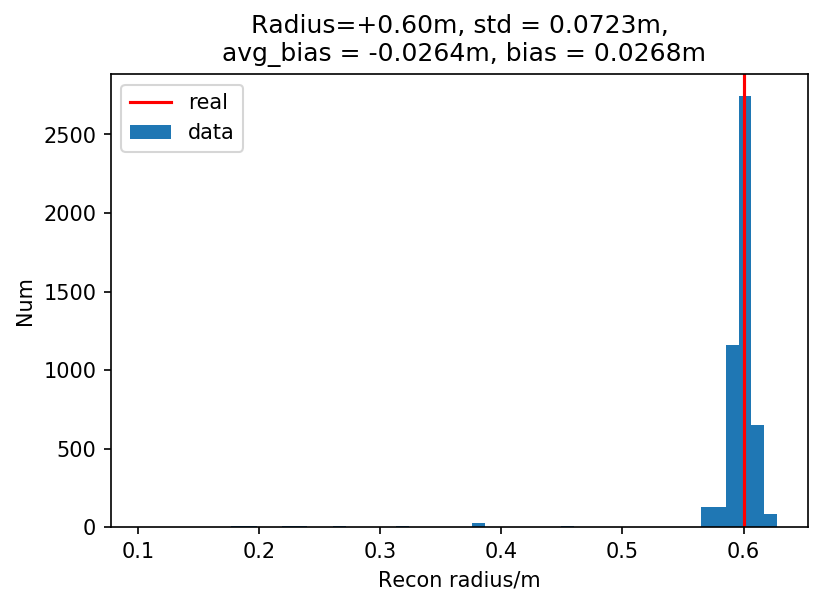

In [3]:
# example of read 1 file
def main(path):
    for i,file in enumerate(np.arange(-0.60,0.65,0.05)):
    h = tables.open_file('../%s/1t_%+.2f.h5' % (path, file),'r')
    recondata = h.root.Recon
    ID = recondata[:]['EventID']
    E_raw = recondata[:]['E_sph']
    x_raw = recondata[:]['x_sph']
    y_raw = recondata[:]['y_sph']
    z_raw = recondata[:]['z_sph']
    L_raw = recondata[:]['Likelihood']
    s_raw = recondata[:]['success']
    # post process data
    size = np.size(np.unique(ID))
    data = np.zeros((5, size))
    for j_index, IDu in enumerate(np.unique(ID)):
        if(IDu == 0):
            pass
        else:
            index = (ID == IDu)
            x1 = x_raw[index]
            y1 = y_raw[index]
            z1 = z_raw[index]
            if(np.size(x1)>1):
                a  = np.vstack((x1, y1, z1))
                dist = pdist(a.T)
                dist = squareform(dist)
                L_tmp = L_raw[index]
                E_tmp = E_raw[index]
                x_tmp = x_raw[index]
                y_tmp = y_raw[index]
                z_tmp = z_raw[index]
                s_tmp = s_raw[index]
                while np.sum(dist<0.01) > np.size(dist[0,:]):
                    flag = 0
                    for k in np.arange(np.size(dist[0,:])):
                        for l in np.arange(np.size(dist[0,:])):
                            if (dist[k,l] < 0.01) & (l!=k):
                                flt = np.arange(np.size(dist[0,:]))!= l
                                dist = dist[flt]
                                dist = dist[:, flt]
                                E_tmp = E_tmp[flt]
                                x_tmp = x_tmp[flt]
                                y_tmp = y_tmp[flt]
                                z_tmp = z_tmp[flt]
                                s_tmp = s_tmp[flt]
                                L_tmp = L_tmp[flt]
                                flag = 1
                                break
                            else:
                                pass
                        if(flag == 1):
                            break
                L_index = np.where(L_tmp == np.min(L_tmp))[0][0]
                data[0,j_index] = E_tmp[L_index]
                data[1,j_index] = x_tmp[L_index]
                data[2,j_index] = y_tmp[L_index]
                data[3,j_index] = z_tmp[L_index]
                data[4,j_index] = s_tmp[L_index]
                sort = np.argsort(L_tmp)
                try:
                    #if((L_tmp[sort][0] < L_tmp[sort][1] - 5) & (L_tmp[sort][0] > L_tmp[sort][1] - 1)):
                    #    data[4,j_index] = 0
                    if((L_tmp[sort][0] > L_tmp[sort][1])):
                        data[4,j_index] = 0
                except:
                    pass
            else:
                data[0,j_index] = E_raw[j_index]
                data[1,j_index] = x_raw[j_index]
                data[2,j_index] = y_raw[j_index]
                data[3,j_index] = z_raw[j_index]
                data[4,j_index] = s_raw[j_index]

    data = data[:,~(data[4,:]==0)]
    return data
        
        
        
        x = data[1]
        y = data[2]
        z = data[3]
        
        r = np.sqrt(x**2 + y**2 + z**2)
        index = (r>0.01) & (r<0.63)
        H1, xedges, yedges = np.histogram2d((x[index])**2 + (y[index])**2, z[index], bins=50)
        X, Y = np.meshgrid(xedges[1:],yedges[1:])
        plt.figure(dpi=150)
        plt.contourf(X,Y,np.log(np.transpose(H1)+1))
        plt.colorbar()
        plt.xlabel('x^2 + y^2/m^2')
        plt.ylabel('z/m')
        plt.title('radius=%+.2fm' % file)
        plt.savefig('./fig/Scatter_1MeV%+.2f.pdf' % file)
        plt.show()

        plt.figure(dpi=150)
        plt.hist(r[index], bins=50)
        plt.axvline(np.abs(file), color='red')
        plt.xlabel('Recon radius/m')
        plt.ylabel('Num')
        plt.legend(['real','data'])
        plt.title('Radius=%+.2fm, std = %.4fm,\n avg_bias = %.4fm, bias = %.4fm' \
                  % (file, np.std(z[index]-file), np.mean(z[index]-file), np.mean(np.abs(z[index]-file))))
        plt.savefig('./fig/HistR_1MeV%+.2f.pdf' % file)
        plt.show()
main('result_1t_2.0MeV_015_15_seg3')